![header](https://i.imgur.com/I4ake6d.jpg)

# IN SITU BALTIC SEA TRAINING

<div style="text-align: right"><i> 13-05-Part-three-out-of-five </i></div>

***
# BAL `NRT` product/dataset: managing files (Tide Gauges)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1 Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Tide-Gauge-(TG)-data" data-toc-modified-id="3.-Tide-Gauge-(TG)-data">3. Tide Gauge (TG) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-file" data-toc-modified-id="3.1.-Reading-file">3.1. Reading file</a></span></li>
                <li><span><a href="#3.2.-Subsetting-Operations" data-toc-modified-id="3.2. Subsetting-Operations">3.2. Subsetting Operations</a></span>
                <li><span><a href="#3.3.-Sampling-Operations" data-toc-modified-id="3.3.-Sampling-Operations">3.3. Sampling Operations</a></span>
                    <ul>
                        <li><span><a href="#3.3.1.-Selecting-Good-data-(QC-flags)" data-toc-modified-id="3.3.1.-Selecting-Good-data-(QC-flags)">3.3.1. Selecting Good data (QC flags)</a></span></li>
                        <li><span><a href="#3.3.2.-Upsampling/Downsampling" data-toc-modified-id="3.3.2.-Upsampling/Downsampling">3.3.2. Upsampling/Downsampling</a></span></li>
                    </ul>
                </li>
        <li><span><a href="#3.4.-Exporting-data-to-csv" data-toc-modified-id="3.4.-Exporting-data-to-csv">3.4. Exporting data to csv</a></span></li>
            </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

***

## 1. Introduction

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the data source types available are the Tide Gauges. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Tide Gauges ('TG' data type) and let's check its data. If you wanna skip the downloading part you can use the netCDF files available at the `/data/files/TG` folder instead.  

## 2. Setup

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import os
import xarray
import matplotlib.pyplot as plt
import folium
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell int he notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)
</div>

## 3. Tide Gauge (TG) data

Tide Gauges are fixed platfoms measuring a Sea Level data over time plus, potentially, other ocenographic variables.<br>
Let's see the data of one of the available TideGauges in the BAL. 

### 3.1. Reading file

`Run the next cell` to see the tide gauges files already available in the `/data/files/TG` folder:

In [2]:
output_dir = os.path.join(os.getcwd(),'data','files','TG')
os.listdir(output_dir)

['BO_TS_TG_Forsmark.nc',
 'BO_TS_TG_Triigi.nc',
 'BO_TS_TG_Arko.nc',
 'BO_TS_TG_Stockholm.nc',
 'BO_TS_TG_NynasFiskehamn.nc',
 'BO_TS_TG_Paldiski.nc',
 'BO_TS_TG_Hanko.nc',
 'BO_TS_TG_Tallinnamadal.nc',
 'BO_TS_TG_Turku.nc',
 'BO_TS_TG_Eisma.nc',
 'BO_TS_TG_Loudden.nc',
 'BO_TS_TG_Kelnase.nc',
 'BO_TS_TG_Hamina.nc',
 'BO_TS_TG_Parnu.nc',
 'BO_TS_TG_Marviken.nc',
 'BO_TS_TG_Lehtma.nc',
 'BO_TS_TG_Leppneeme.nc',
 'BO_TS_TG_Bonan.nc',
 'BO_TS_TG_Munalaid.nc',
 'BO_TS_TG_Virtsu.nc',
 'BO_TS_TG_Helsinki.nc',
 'BO_TS_TG_Porvoo.nc',
 'BO_TS_TG_Tallinn.nc',
 'BO_TS_TG_Heltermaa.nc',
 'BO_TS_TG_LandsortNorra.nc',
 'BO_TS_TG_OxelosundVinterklasen.nc',
 'BO_TS_TG_Rohukula.nc',
 'BO_TS_TG_Juten.nc',
 'BO_TS_TG_Degerby.nc',
 'BO_TS_TG_E4BronSodertalje.nc']

`Set one` of the above available `file name` and `run the next cells`:

In [3]:
file = 'BO_TS_TG_Arko.nc'
path = os.path.join(os.getcwd(), 'data','files','TG', file)

In [4]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 1, LATITUDE: 43066, LONGITUDE: 43066, POSITION: 43066, TIME: 43066)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2014-04-02T08:00:00 ... 2020-01-08T13:...
  * LATITUDE     (LATITUDE) float32 58.48 58.48 58.48 ... 58.48 58.48 58.48
  * LONGITUDE    (LONGITUDE) float32 16.96 16.96 16.96 ... 16.96 16.96 16.96
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float32 ...
    POSITION_QC  (POSITION) float32 ...
    SLEV         (TIME, DEPTH) float64 ...
    SLEV_QC      (TIME, DEPTH) float32 ...
    DEPH         (TIME, DEPTH) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    TEMP         (TIME, DEPTH) float64 ...
    TEMP_QC      (TIME, DEPTH) float32 ...
Attributes:
    naming_authority:            Copernicus
    area:                        Baltic Sea
    format_version:              1.2
    contact:                     cmems-service@smhi.se
    author:                      cmems-service
    cdm_data_type:               Station
    summary:                     Oceanographic data from the Baltic Sea. Meas...
    references:                  http://www.oceansites.org http://www.myocean...
    data_assembly_center:        Baltic INS TAC DU
    citation:                    These data were collected and made freely av...
    Conventions:                 CF-1.6 OceanSITES-Manual-1.2 Copernicus-InSi...
    qc_manual:                   OceanSITES User's Manual v1.1
    distribution_statement:      These data follow Copernicus standards; they...
    quality_index:               A
    comment:                     None
    netcdf_version:              netCDF-4 classic model
    source:                      land/onshore structure
    geospatial_lon_min:          16.9607
    quality_control_indicator:   1
    history_version:             5
    geospatial_lon_max:          16.9607
    data_type:                   OceanSITES time-series data
    platform_code:               Arko
    geospatial_vertical_min:     0.0000
    time_coverage_end:           2020-01-08T13:00:00Z
    id:                          BO_TS_TG_Arko
    update_interval:             monthly
    last_date_observation:       2020-01-08T13:00:00Z
    time_coverage_start:         2014-04-02T08:00:00Z
    history:                     2019-10-09T13:04:09Z File created by SMHI Ba...
    geospatial_vertical_max:     0.0000
    institution_references:      johanna.linders@smhi.se
    last_longitude_observation:  16.9607
    pi_name:                     SMHI
    geospatial_lat_min:          58.4843
    wmo_platform_code:           -
    geospatial_lat_max:          58.4843
    institution_edmo_code:       545
    data_mode:                   D
    site_code:                   Arko
    title:                       Global Ocean - In Situ Wave Observations Re-...
    date_update:                 2020-01-09T14:10:56Z
    last_latitude_observation:   58.4843
    institution:                 SMHI

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>i.e We are able to know already the platform last position. Let's draw it on a map: `run the next cell`

In [5]:
m = folium.Map(
    location=[ds.attrs['last_latitude_observation'],ds.attrs['last_longitude_observation']],
    zoom_start=6
)
tooltip = ds.platform_code
folium.Marker([float(ds.last_latitude_observation), float(ds.last_longitude_observation)], tooltip=tooltip).add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).
</div>

<br>Let's list now the available variables: `run the next cell`

In [6]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
SLEV:Water surface height above a specific datum
SLEV_QC:quality flag
DEPH:Depth
DEPH_QC:quality flag
TEMP:Sea temperature
TEMP_QC:quality flag


Let's focus on one of the parameters `run he next cell` to see its attributes:

In [7]:
param = 'SLEV'
ds[param][:,0]

<xarray.DataArray 'SLEV' (TIME: 43066)>
array([-0.132, -0.134, -0.135, ...,  0.132,  0.13 ,  0.099])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-04-02T08:00:00 ... 2020-01-08T13:00:00
Attributes:
    valid_max:          10.0
    long_name:          Water surface height above a specific datum
    standard_name:      water_surface_height_above_reference_datum
    valid_min:          -10.0
    units:              m
    processing_method:  instantaneous values
    sea_level_datum:    MSL
    time_sampling:      60.0

Let's have  a look to the whole parameter time serie: `run the next cell`

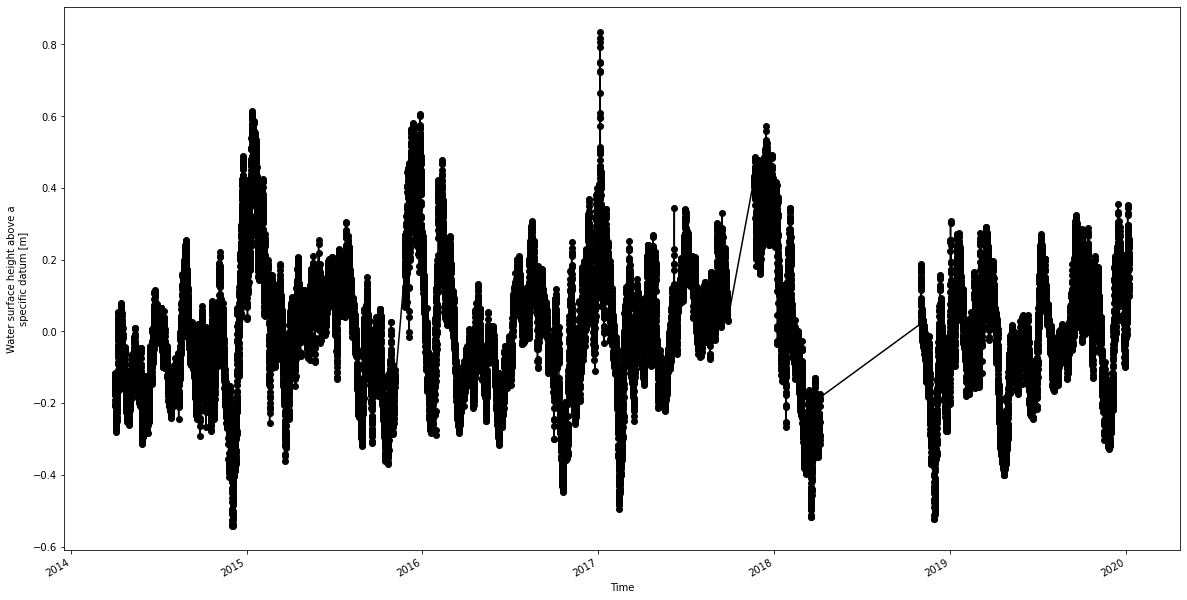

In [8]:
ds[param][:,0].plot(aspect=2, size=10, color='k', marker='o')

### 3.2. Subsetting Operations

Let's select an specific time range:

In [9]:
start = '2019-01-01'
end = '2019-12-30'

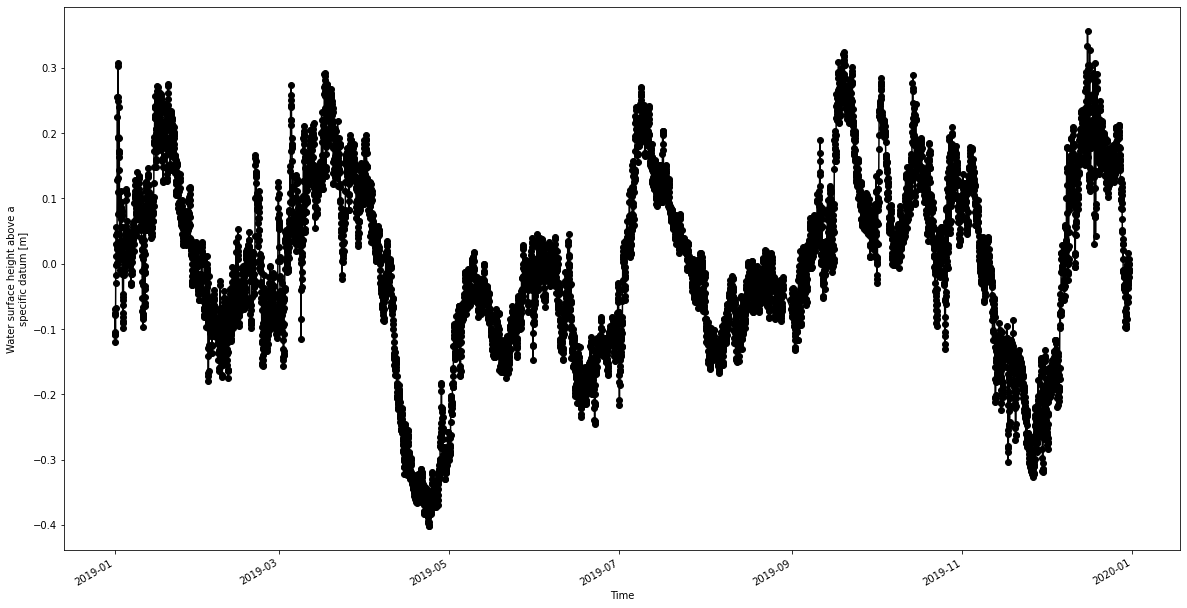

In [10]:
subset = ds[param][:,0].sel(TIME=slice(start, end))
subset.plot(aspect=2, size=10, color='k', marker='o')

### 3.3. Sampling Operations

We will upsample and downsample the above serie subset, not the original one, to better see the diferences.

#### 3.3.1. Selecting Good data (QC flags)

Is it there any bad data in the above time serie? `Run the next cell`to check the quality flags assigned to the parameter:

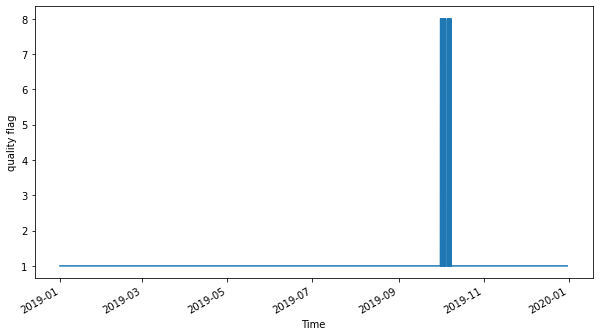

In [11]:
subset_QC = ds[param+'_QC'][:,0].sel(TIME=slice(start, end))
subset_QC.plot(aspect=2, size=5)

All In Situ TAC variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable. <br>
Let's check all posible 'QC' values: `run the next cell`

In [12]:
pd.DataFrame(data=ds[param+'_QC'][:,0].attrs['flag_values'],
             index=ds[param+'_QC'][:,0].attrs['flag_meanings'].split(' '), 
             columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


From the above list, users are recommended to use only the data flagged as 1; so that, when working with any of the variables, we will perfom first a data cleaning to use only the 'good data'.

If we wanted to do so (only if in the plot above we saw values different from 1 the operation would be:

In [13]:
subset_good = subset.where(subset_QC == 1)

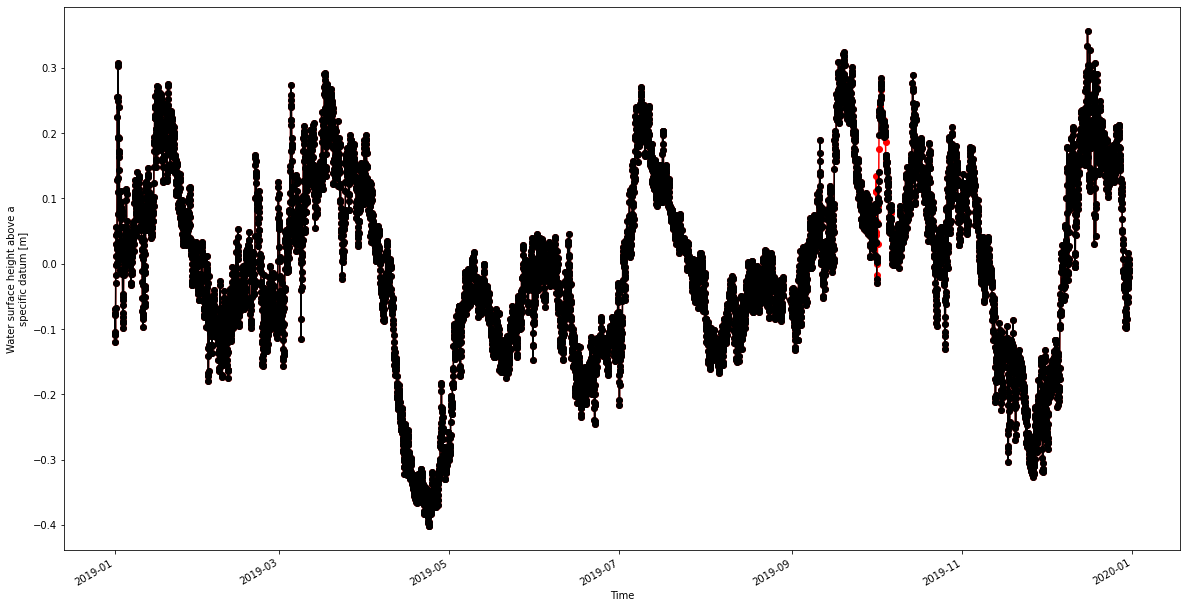

In [15]:
subset.plot(aspect=2, size=10, color='r', marker='o')#original serie en red
subset_good.plot(color='k', marker='o')#clean serie in black

#### 3.3.2. Upsampling/Downsampling

<ul> <li>Downsamplig </li></ul>
Let's see next a downsampling example; this is, retrieveing less observations in a given period by agregating some-how <i>i.e mean of the original number of observations</i>. Let's get, by averaging, a mothly resolution sampling: `run the next cell`

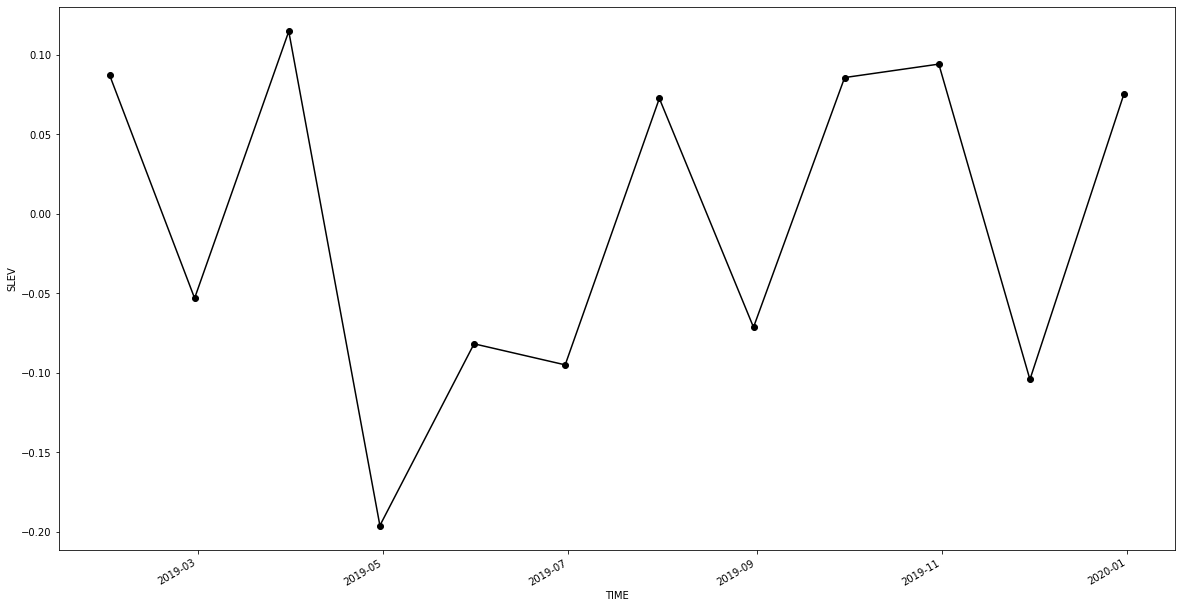

In [16]:
(subset_good.resample(TIME='1M').mean()).plot(aspect=2, size=10, color='k', marker='o')

<ul><li>Upsampling</ul></li>

Let's see next a upsampling example; this is, retrieveing more observations in a given period by inferring new ones some-how i.e <i>interpolating the original number of observations</i>. Let's get, by interpolating, a 10 minute resolution instead:

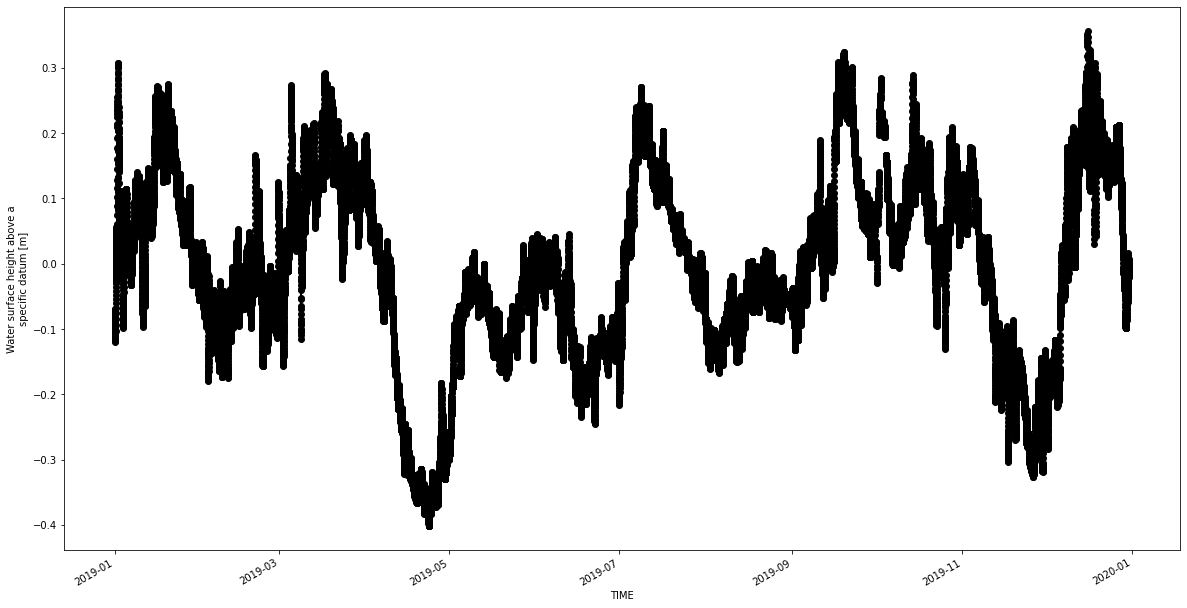

In [17]:
(subset_good.resample(TIME='10Min').interpolate('linear')).plot(aspect=2, size=10, color='k', marker='o')

### 3.4. Exporting data to csv

Let's export the full serie to csv.

1) `run the next cell` to create a dataframe:

In [18]:
dataframe = subset_good.to_dataframe()
dataframe.transpose()

TIME,2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01 02:00:00,2019-01-01 03:00:00,2019-01-01 04:00:00,2019-01-01 05:00:00,2019-01-01 06:00:00,2019-01-01 07:00:00,2019-01-01 08:00:00,2019-01-01 09:00:00,...,2019-12-30 14:00:00,2019-12-30 15:00:00,2019-12-30 16:00:00,2019-12-30 17:00:00,2019-12-30 18:00:00,2019-12-30 19:00:00,2019-12-30 20:00:00,2019-12-30 21:00:00,2019-12-30 22:00:00,2019-12-30 23:00:00
SLEV,-0.109,-0.107,-0.079,-0.069,-0.075,-0.105,-0.12,-0.067,-0.03,-0.017,...,-0.023,0.017,0.008,-0.008,-0.001,-0.011,-0.013,-0.021,-0.01,-0.001


2) `run the next cell` to reset the time axis to readable dates

In [19]:
df_with_readable_time = dataframe.set_index(dataframe.index.astype(str).str[:13])
df_with_readable_time.transpose()

TIME,2019-01-01 00,2019-01-01 01,2019-01-01 02,2019-01-01 03,2019-01-01 04,2019-01-01 05,2019-01-01 06,2019-01-01 07,2019-01-01 08,2019-01-01 09,...,2019-12-30 14,2019-12-30 15,2019-12-30 16,2019-12-30 17,2019-12-30 18,2019-12-30 19,2019-12-30 20,2019-12-30 21,2019-12-30 22,2019-12-30 23
SLEV,-0.109,-0.107,-0.079,-0.069,-0.075,-0.105,-0.12,-0.067,-0.03,-0.017,...,-0.023,0.017,0.008,-0.008,-0.001,-0.011,-0.013,-0.021,-0.01,-0.001


3) Exporting dataframe to csv: `run the next cells`!

In [20]:
out_put_dir = os.getcwd() #by default: current working directory. Set a different path if you want

In [21]:
file_name = ds.attrs['platform_code']+'_time_serie.csv'
file_name

'Arko_time_serie.csv'

In [22]:
df_with_readable_time.to_csv(os.path.join(out_put_dir, file_name))

<div class="alert alert-block alert-info">
<b>TIP</b>
    
***  
Check your output directory for the file exported and inspect the content!
</div>

---



## 4. Wrap-up

So far you should already know how to deal with Time Serie data from fixed platforms (tide gauges, moorings, river flows...).<br> `If you don't please ask us! it is the moment!`

***